In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from scipy import stats

In [3]:
d = pd.read_csv('adult.csv')

In [4]:
d.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [5]:
# Replacing ? with Others.

In [6]:
d['occupation'].replace({'?':'Other-service'},inplace=True)

In [7]:
d['workclass'].replace({'?':'Others'},inplace=True)

In [8]:
d['native-country'].replace({'?':'Others'},inplace=True)

In [9]:
d.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Others,103497,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Others,227026,HS-grad,9,Never-married,Other-service,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [10]:
# Removing unwanted rows.

In [11]:
d = d[d['workclass']!='Without-pay']
d = d[d['workclass']!='Never-worked']

In [12]:
d = d[d['education']!='Preschool']
d = d[d['education']!='1st-4th']
d = d[d['education']!='5th-6th']
d = d[d['education']!='7th-8th']
d = d[d['education']!='9th']

In [13]:
d.drop(columns=['educational-num'],inplace = True)

In [14]:
d = d[d['marital-status']!='Married-AF-spouse']

In [15]:
d = d[d['occupation']!='Armed-Forces']

In [16]:
unwanted = d['native-country'].value_counts()[d['native-country'].value_counts() < 50].index

In [17]:
d = d[~d['native-country'].isin(unwanted)]

In [18]:
d['native-country'].value_counts()

native-country
United-States         42180
Others                  794
Mexico                  446
Philippines             270
Germany                 204
Canada                  173
India                   149
Puerto-Rico             148
England                 124
South                   113
Cuba                    112
China                   110
Jamaica                 101
Japan                    91
El-Salvador              85
Italy                    82
Poland                   80
Vietnam                  78
Columbia                 75
Dominican-Republic       67
Taiwan                   65
Haiti                    61
Iran                     59
Name: count, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1fd0cc69dd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fd0cc40650>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fd0cc69010>],
 'medians': [<matplotlib.lines.Line2D at 0x1fd0cc790d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fd0cc401d0>],
 'means': []}

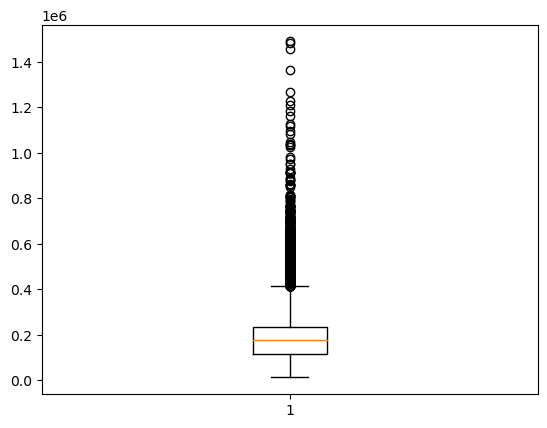

In [19]:
plt.boxplot(d['fnlwgt'])

In [20]:
Q1 = d['fnlwgt'].quantile(0.25) # 25th percentile
Q3 = d['fnlwgt'].quantile(0.75) # 75th percentile
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [21]:
d = d[(d['fnlwgt'] >= lower_bound) & (d['fnlwgt'] <= upper_bound)]

In [22]:
max(d['fnlwgt'])

414545

In [23]:
# for age column.

{'whiskers': [<matplotlib.lines.Line2D at 0x1fd0ca71410>,
 'caps': [<matplotlib.lines.Line2D at 0x1fd0ca72bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fd0ca707d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1fd0ca7c310>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fd0ca7ccd0>],
 'means': []}

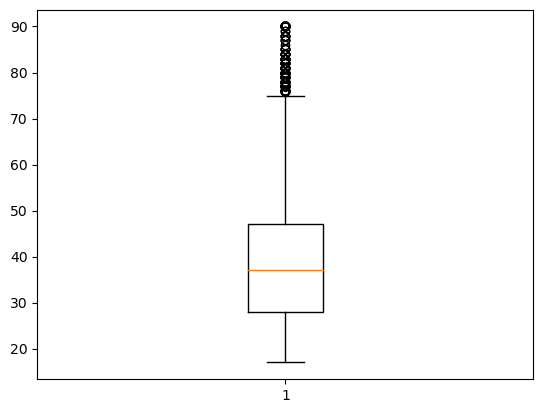

In [24]:
plt.boxplot(d['age'])

In [25]:
Q1 = d['age'].quantile(0.25) # 25th percentile
Q3 = d['age'].quantile(0.75) # 75th percentile
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [26]:
d = d[(d['age'] >= lower_bound) & (d['age'] <= upper_bound)]

{'whiskers': [<matplotlib.lines.Line2D at 0x1fd0cae9f10>,
 'caps': [<matplotlib.lines.Line2D at 0x1fd0cae8950>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fd0cae92d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1fd0caf8dd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fd0cc68850>],
 'means': []}

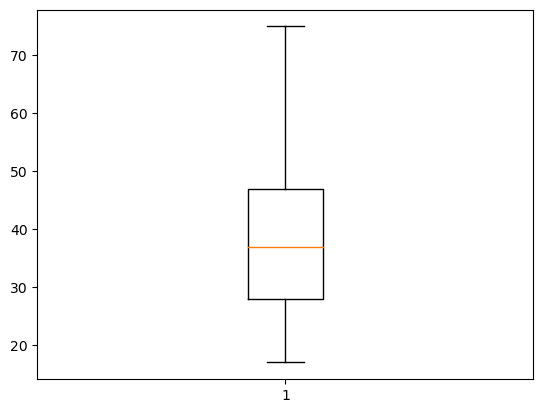

In [27]:
plt.boxplot(d['age'])

In [28]:
# for hours-per-week column

{'whiskers': [<matplotlib.lines.Line2D at 0x1fd0cd3e910>,
 'caps': [<matplotlib.lines.Line2D at 0x1fd0cd44150>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fd0cd3dd50>],
 'medians': [<matplotlib.lines.Line2D at 0x1fd0cd455d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fd0cd46110>],
 'means': []}

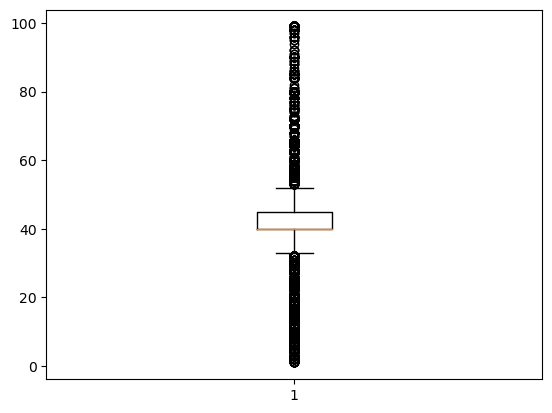

In [29]:
plt.boxplot(d['hours-per-week'])

In [30]:
Q1 = d['hours-per-week'].quantile(0.25)  # 25th percentile
Q3 = d['hours-per-week'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [31]:
d = d[(d['hours-per-week'] >= lower_bound) & (d['hours-per-week'] <= upper_bound)]

{'whiskers': [<matplotlib.lines.Line2D at 0x1fd0cda2450>,
 'caps': [<matplotlib.lines.Line2D at 0x1fd0cda3c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fd0cda17d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1fd0cdad210>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fd0cca5bd0>],
 'means': []}

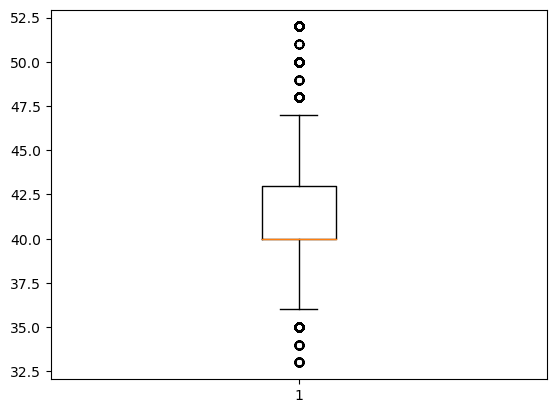

In [32]:
plt.boxplot(d['hours-per-week'])

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
encoder = LabelEncoder()

In [35]:
d['workclass'] = encoder.fit_transform(d['workclass'])
d['gender'] = encoder.fit_transform(d['gender'])
d['occupation'] = encoder.fit_transform(d['occupation'])
d['marital-status'] = encoder.fit_transform(d['marital-status'])
d['relationship'] = encoder.fit_transform(d['relationship'])
d['race'] = encoder.fit_transform(d['race'])
d['native-country'] = encoder.fit_transform(d['native-country'])
d['education'] = encoder.fit_transform(d['education'])

In [36]:
d.head(10)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,1,3,5,3,2,1,0,0,40,21,<=50K
1,38,3,89814,7,1,3,0,4,1,0,0,50,21,<=50K
2,28,1,336951,3,1,9,0,4,1,0,0,40,21,>50K
3,44,3,160323,10,1,5,0,2,1,7688,0,40,21,>50K
6,29,2,227026,7,3,6,4,2,1,0,0,40,21,<=50K
8,24,3,369667,10,3,6,4,4,0,0,0,40,21,<=50K
10,65,3,184454,7,1,5,0,4,1,6418,0,40,21,>50K
11,36,0,212465,5,1,0,0,4,1,0,0,40,21,<=50K
12,26,3,82091,7,3,0,1,4,0,0,0,39,21,<=50K
13,58,2,299831,7,1,6,0,4,1,0,0,35,21,<=50K


In [37]:
d.reset_index(drop=True, inplace=True)

In [38]:
d.head(10)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,1,3,5,3,2,1,0,0,40,21,<=50K
1,38,3,89814,7,1,3,0,4,1,0,0,50,21,<=50K
2,28,1,336951,3,1,9,0,4,1,0,0,40,21,>50K
3,44,3,160323,10,1,5,0,2,1,7688,0,40,21,>50K
4,29,2,227026,7,3,6,4,2,1,0,0,40,21,<=50K
5,24,3,369667,10,3,6,4,4,0,0,0,40,21,<=50K
6,65,3,184454,7,1,5,0,4,1,6418,0,40,21,>50K
7,36,0,212465,5,1,0,0,4,1,0,0,40,21,<=50K
8,26,3,82091,7,3,0,1,4,0,0,0,39,21,<=50K
9,58,2,299831,7,1,6,0,4,1,0,0,35,21,<=50K


In [39]:
d.shape

(31943, 14)

In [40]:
d.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,1,3,5,3,2,1,0,0,40,21,<=50K
1,38,3,89814,7,1,3,0,4,1,0,0,50,21,<=50K
2,28,1,336951,3,1,9,0,4,1,0,0,40,21,>50K
3,44,3,160323,10,1,5,0,2,1,7688,0,40,21,>50K
4,29,2,227026,7,3,6,4,2,1,0,0,40,21,<=50K


In [41]:
d['income'] = d['income'].replace({'<=50K': 0, '>50K': 1})

In [42]:
d.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,1,3,5,3,2,1,0,0,40,21,0
1,38,3,89814,7,1,3,0,4,1,0,0,50,21,0
2,28,1,336951,3,1,9,0,4,1,0,0,40,21,1
3,44,3,160323,10,1,5,0,2,1,7688,0,40,21,1
4,29,2,227026,7,3,6,4,2,1,0,0,40,21,0


In [43]:
d['income'].dtype

dtype('int64')

In [44]:
d.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,1,3,5,3,2,1,0,0,40,21,0
1,38,3,89814,7,1,3,0,4,1,0,0,50,21,0
2,28,1,336951,3,1,9,0,4,1,0,0,40,21,1
3,44,3,160323,10,1,5,0,2,1,7688,0,40,21,1
4,29,2,227026,7,3,6,4,2,1,0,0,40,21,0


In [45]:
d.drop(columns=['race','gender','native-country'], inplace = True)

In [46]:
d.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week,income
0,25,3,226802,1,3,5,3,0,0,40,0
1,38,3,89814,7,1,3,0,0,0,50,0
2,28,1,336951,3,1,9,0,0,0,40,1
3,44,3,160323,10,1,5,0,7688,0,40,1
4,29,2,227026,7,3,6,4,0,0,40,0


In [47]:
d['net-capital'] = d['capital-gain'] - d['capital-loss']

In [48]:
d.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week,income,net-capital
0,25,3,226802,1,3,5,3,0,0,40,0,0
1,38,3,89814,7,1,3,0,0,0,50,0,0
2,28,1,336951,3,1,9,0,0,0,40,1,0
3,44,3,160323,10,1,5,0,7688,0,40,1,7688
4,29,2,227026,7,3,6,4,0,0,40,0,0


In [49]:
d.drop(columns=['capital-gain','capital-loss'],inplace = True)

In [50]:
d.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,hours-per-week,income,net-capital
0,25,3,226802,1,3,5,3,40,0,0
1,38,3,89814,7,1,3,0,50,0,0
2,28,1,336951,3,1,9,0,40,1,0
3,44,3,160323,10,1,5,0,40,1,7688
4,29,2,227026,7,3,6,4,40,0,0


In [51]:
# splitting dataset in input and output columns.

In [52]:
x = d.drop(columns=['income'])
y = d['income']

In [53]:
# train-test split and then standardization on numerical columns.

In [54]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [56]:
numerical_cols = ['age', 'fnlwgt', 'hours-per-week', 'net-capital']

In [57]:
scaler = StandardScaler()
x_train[numerical_cols] = scaler.fit_transform(x_train[numerical_cols])

In [58]:
x_test[numerical_cols] = scaler.transform(x_test[numerical_cols])

In [59]:
# my model

In [60]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(
    n_estimators=250,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

Gradient Boosting Accuracy: 0.8648
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      5031
           1       0.65      0.80      0.71      1358

    accuracy                           0.86      6389
   macro avg       0.79      0.84      0.81      6389
weighted avg       0.88      0.86      0.87      6389

[[4442  589]
 [ 275 1083]]


In [62]:
import joblib

In [63]:
joblib.dump(model, "my_model.pkl")

['my_model.pkl']

In [64]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.6.1
Summary: A set of python modules for machine learning and data mining
Home-page: 
Author: 
Author-email: 
License: BSD 3-Clause License

 Copyright (c) 2007-2024 The scikit-learn developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are met:

 * Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

 * Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

 * Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software without specific prior written permission.

 THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIB